# Sketchem: A Molecular Pictionary 
---
Welcome to this interactive Jupyter Notebook! 

**About This Notebook:**
This notebook is designed to provide an interactive and visual introduction to Sketchem, a molecular pictionary game. It can identify hand-drawn molecular structures and convert them into standardized SMILES notation. But Sketchem doesn't do just that. Whether you're a chemistry student learning to draw structures, or simply want to play a game of molecular pictionary against your friends, using Sketchem you can choose which category of molecules to learn and practice drawing them. With advanced image recognition, Sketchem will tell you if they are correct! You can beat your friends in multiplayer mode or simply practice yourself in single player mode. Whether you're a researcher sketching molecules, or simply interested in the intersection of chemistry and computer vision, this notebook provides insights into how Sketchem works and the problems it solves.


**Getting Started:**
Each section contains explanations, code demonstrations, and visualizations to help you understand the capabilities of Sketchem.

**How to Use:**
Feel free to run the code cells to see Sketchem in action. The notebook demonstrates key functionalities without diving too much into implementation details.

**Let's Dive In!**
Start exploring the world of molecular recognition with Sketchem! 

## Introduction: The Chemistry of Molecular Representation
---

### Our idea

Our idea was largely inspired by a class we had to take last semester: Biochemistry. Every student in the class had to learn the amino acids by heart. As we spent hours tediously memorising each molecule, we thought: “There must be a better way of learning this”
That’s when the idea for Sketchem came to life: a molecular pictionary where you can choose a group of molecules, (you can AI-generate you own or chose from the pre-made categories we prepared), to learn and practice playing against your peers. Alternatively, you can sharpen your skills in solo mode (so you can beat your friends later). 


### The Challenge of Chemical Structure Recognition

Chemical structures are the visual language of chemistry. Chemists communicate molecular structures through standardized drawings that represent atoms, bonds, and spatial arrangements. However, translating between hand-drawn structures and computer-readable formats presents significant challenges:

1. **Variability in Drawing Styles**: The same molecule can look very different when drawn by different people. Factors like varying bond angles, atom placements, or even shorthand notations can confuse recognition systems.
2. **Complexity of Representation**: Chemical structures can range from simple linear molecules to complex polycyclic compounds with multiple functional groups.
3. **Standardization Requirements**: Before a computer can "understand" a structure, it must be translated into a standard format like SMILES.

### SMILES Notation: The Digital Language of Chemistry

SMILES (Simplified Molecular Input Line Entry System) is a way to represent chemical structures using a line of text. It captures atoms, bonds, branching, and rings with a consistent syntax, making molecules easy to store, compare, and search computationally.

- Examples:
  - Methane → C
  - Ethanol → CCO
  - Benzene → c1ccccc1

SMILES makes it possible for chemical software, databases (like PubChem), and AI models to work with molecules.


### The Role of AI in Chemical Structure Recognition

Instead of relying on a traditional chemical OCR model like DECIMER, Sketchem uses Google Gemini, a multimodal large language model, to power its structure recognition.

- Analyzing the sketch: When a user draws a molecule in Sketchem, the sketch is processed and described to Gemini as visual or structural input.
- Interpretating and matching: Gemini analyzes the molecule and returns its likely identity or molecular name based on learned chemical patterns and visual reasoning.
- Validating and feedback: The predicted name is converted to a SMILES string using PubChem, which provides the correct structure for feedback and scoring.


## Sketchem
---

### What is Sketchem?

a molecular pictionary where you can choose a group of molecules to learn, whether its from the categories we’ve already made or AI-generated your own. You can play the multiplayer mode to learn and practice with friends or you can sharpen your skills in solo mode (so you can beat your friends later). 

### Motivation

1. **Educational Tool**: Helps students learn to draw and memorize chemical structures
2. **AI's Capabilities**: Displays the power of multimodal models and how they can be put to good use.

### Architecture Overview

Sketchem is built using a modern web application stack:

1. **Frontend**: Built with Streamlit, enabling rapid development of interactive web apps in Python
2. **Drawing Interface**: Streamlit-drawable-canvas for the molecular drawing canvas
3. **AI Integration**: Google Gemini analyzes the sketches and predicts the most likely molecule name based on visual input
4. **Chemical Processing**: RDKit for molecular validation and visualization
5. **State Management**: Handled with Streamlit’s session state, ensures game progress and user input are tracked
6. **Multiplayer**: In-memory database for multiplayer functionality



## Educational Impact and Applications
---

Below is an overview of the educational impact and applications of Sketchem:

### Chemistry Education

1. **Interactive Learning**: Makes learning chemical structures more engaging and encourages repeated practice through competition
2. **Immediate Feedback**: Helps students correct their mistakes quickly using almost-instantaneous feedback called "Hints"
3. **Paper-like Drawing Experience**: Our idea behind using a canvas-based drawing platform instead of the typical bond / atom molecule drawing packages was its similarity to how one learn to draw molecules in classrooms; and we strongly believe our canvas-based approach is optimized for a proper learning experience. 

Sketchem also serves as a proof of concept (POC) for how multimodal AI (Gemini) can be used to recognize hand-drawn molecules and convert them to SMILES strings. This has applications in many fields, such as:

### Research Applications

1. **Rapid Digitization**: Our code could be reused and perfected to create a tool like DECIMER that allows researchers to quickly digitize hand-drawn ideas, but without the cumbersome aspect of ML models nor the wait times associated with using ML-based packages like DECIMER.

2. **Quick Database Creations**: Our code could be reused and perfected to create a tool that generates a very detailed database that includes molecule names, SMILES strings and much more information, from a single user-typed prompt.

3. **Teaching Tool for Educators**:
Teachers could use Sketchem in class to host real-time molecule-drawing games, quizzes, or assessments, adding fun and interaction to traditional lectures.


## Game Mechanics: How Sketchem Works
---

Sketchem offers both single-player and multiplayer modes, each with unique gameplay mechanics:

### Multiplayer Mode 
↳ **Room Creation**: A host creates a game room with a unique code, a unique molecule category, and a set game duration
 
↳ **Player Joining**: Other players join using the room code

↳ **Same Challenges**: All players receive the same molecules to draw and have to draw them before the timer ends

↳ **Drawing is translated to SMILES**: The drawings are translated to SMILES strings using Gemini

↳ **Molecules is recognised**: The generated SMILES is then compared with correct answers (via PubChem) to determine if the structure is scientifically valid and whether the player guessed the right molecule. 

↳ **Real-time Leaderboard**: Scores are updated in real-time and players are ranked not just based on their score but also based on the time it took them to get that score



### Single-Player Mode

↳ **The Same but Better**: The singleplayer option offers all of the options of the multiplayer one, except YOU choose your own pace and what you want to work on 

↳ **Validation & Feedback**: Just like for the multiplayer option, you can choose to receive immediate feedback on your drawing accuracy using the "Hint" option


The multiplayer functionality is implemented using Streamlit's session state and an in-memory database, allowing for a seamless multiplayer experience without requiring external database services like Firestore.




## 💻 Challenges & How We Handled Them
---

At the beginning of the project, our biggest challenge was figuring out how to manage the data for all the Sketchem players. The idea of storing, organizing, and tracking such a large amount of information felt overwhelming. We initially considered using **Firebase / Firestore** (Google's game-oriented database service), which is a cloud-based database. Instead, we quickly realized that Streamlit only runs one instance of every package (for everyone that accesses the website) when it is hosted on its platform Streamlit Cloud. We thus took advantage of that to create a "mock" database which would be stored in a dictionary inside of a python file of our project and would constantly be updated according to the user interactions with the website. This way, we didn't need to maintain an external database, which made things much simpler and helped us avoid extra workload.

As we worked through the project and started developing our ideas, we ran into another big challenge: molecule recognition. Initially, we wanted to use **Decimer** to convert the hand-drawn molecules into SMILES and determine whether the drawing was correct. Although Decimer was incredibly accurate when we tested it locally, we faced several issues including long waiting times (close to 7 minutes for some molecules) and issues with running the ML model on the Streamlit Cloud platform (over-allocation of resources). This pushed us to look for another solution, and that's when we found **Google's Gemini**. Since LLMs are trained on huge amounts of data, our idea was that Gemini would be an ideal contender for Decimer. After switching to Gemini, many issues such as long wait times and allocation limits were fixed. 

Despite the slight improvement with Gemini, the switch from a dedicated ML-based package to a more generic LLM led to other issues such as uneven accuracy and difficulty in adjusting prompts to fit our needs. Not all correctly drawn molecules were recognized, and occasionally, false drawings were marked as correct. Unfortunately, no solution was found for this.


Another issue arose when we decided to use Gemini for automatic category creation. As expected, Gemini's managed to create categories of molecules linked to a specific word or sentence really accurately. However, it really lagged behind when it came to finding the appropriate SMILES for the molecules in these categories. To improve this, we had the idea to connect Gemini to **PubChem**, a specialized chemistry database. This ensured all the generated SMILES were correct and didn't cause any additional issues later during the molecule recognition process.


For building the web application, we chose **Streamlit** because it's a simple tool for creating web apps. It worked well for developing the core functionality of our project without much trouble. However, Streamlit’s simplicity meant that customizing the layout and formatting was harder than we expected. The default design didn’t meet our expectations, and it often resulted in a very plain user interface. This ended up costing us more time than we had planned. Still, we were able to make the best of it by customizing the layout as much as possible using custom div IDs from the deployed HTML code of the app, and we even created different versions of the web app depending on whether the user was on a phone or a computer.


## Setting Up Our Environment
---
Now that we've gotten through all the technical stuff, let's test these awesome features, shall we? 

But first, let's import all the necessary dependencies. Sketchem relies on several key libraries for all of its awesome features!

In [1]:
from sketchem.utils.smiles_validator_ai import validate_drawing_with_ai
from rdkit import Chem
from rdkit.Chem import Draw
import os
from sketchem.utils.create_category import get_molecules_for_category_pubchem
from PIL import Image
from sketchem.utils.environment import get_gemini_api_key
from sketchem.utils.smiles_validator_ai import get_molecule_with_ai
import matplotlib.pyplot as plt
%matplotlib inline


## AI-Powered Category Creation
---

ne of Sketchem’s most powerful features is **AI-powered category creation**.  
As we developed the project, it became clear just how many molecule categories students might want — far beyond what we could manually include. So instead of trying to list them all, we let the user create exactly what they need.

Our web app lets you practice molecules not only from default categories, but also from **custom lists generated by AI**. This means you can tailor the game to match your courses, study goals, or curiosity.


Here’s how it works:

1. Click "Create a molecule category using AI"
2. Type in the category you want to create
2. Click “Generate Category” and wait for AI to generate the category
3. Click “Submit”

And that’s it! Your custom category is created, and you’re ready to go.


Try out the category creation function below and see for yourself: 

In [2]:

# Get API key -> make sure you have one (see readme)
api_key = get_gemini_api_key()

# Example prompts to try
example_prompts = [
    "Common amino acids",
    "Simple aromatic compounds",
    "Molecules used in pain medication"
    # Add more prompts here
]

# Select one prompt to demonstrate
selected_prompt = example_prompts[0] # Change this to try different prompts
print(f"Creating category with prompt: '{selected_prompt}'")

# Create the category
result = get_molecules_for_category_pubchem(api_key=api_key, user_prompt=selected_prompt, jupyternb=True)
print(f"Final Result: {result}")


Creating category with prompt: 'Common amino acids'


2025-05-17 12:43:26.058 Created category (names only): Common amino acids, Elements: ['Glycine', 'Alanine', 'Valine', 'Leucine', 'Isoleucine', 'Serine', 'Threonine', 'Cysteine', 'Methionine', 'Phenylalanine', 'Tyrosine', 'Tryptophan', 'Aspartic acid', 'Glutamic acid', 'Lysine']


Final Result: ('Common amino acids', {'Glycine': 'C(C(=O)O)N', 'Alanine': 'CC(C(=O)O)N', 'Valine': 'CC(C)C(C(=O)O)N', 'Leucine': 'CC(C)CC(C(=O)O)N', 'Isoleucine': 'CCC(C)C(C(=O)O)N', 'Serine': 'C(C(C(=O)O)N)O', 'Threonine': 'CC(C(C(=O)O)N)O', 'Cysteine': 'C(C(C(=O)O)N)S', 'Methionine': 'CSCCC(C(=O)O)N', 'Phenylalanine': 'C1=CC=C(C=C1)CC(C(=O)O)N', 'Tyrosine': 'C1=CC(=CC=C1CC(C(=O)O)N)O', 'Tryptophan': 'C1=CC=C2C(=C1)C(=CN2)CC(C(=O)O)N', 'Aspartic acid': 'C(C(C(=O)O)N)C(=O)O', 'Glutamic acid': 'C(CC(=O)O)C(C(=O)O)N', 'Lysine': 'C(CCN)CC(C(=O)O)N'})


## AI-Powered Molecule Recognition: The Heart of Sketchem
---

At the core of Sketchem is its AI-powered **recognition** system, which uses Google's Gemini AI to interpret hand-drawn molecular structures. The AI has been specifically prompted to understand chemical notation and convert drawings to SMILES strings.

If we recall the overall process:

Drawing → Image → Bytes → Gemini AI → SMILES String → Validation → Feedback

AI-powered recognition focuses on Drawing → SMILES string

### The Recognition Process

1. **Image Capture**: The drawing is captured from the canvas
2. **Preprocessing**: The image is processed to transform it into an easy-to-share format: bytes
3. **AI Analysis**: The image bytes are sent to Gemini AI with the specialized prompt
4. **SMILES Generation**: The AI generates a SMILES string based on the drawing


### Challenges in Molecular Recognition

Recognizing hand-drawn chemical structures presents several challenges:

1. **Variability in Drawing Styles**: Different users draw the same molecule differently
2. **Ambiguity in Representation**: Some structural features can be ambiguous
3. **Complexity of Chemical Notation**: Chemical notation has many special cases
4. **Balance Between Strictness and Flexibility**: The system must be strict enough to ensure chemical accuracy but flexible enough to accommodate different drawing styles

Sketchem addresses these challenges through its specialized AI prompt and validation system, which combines the flexibility of AI interpretation with the strictness of chemical validation. This combination between AI and chemistry ensures feedback is both fast and accurate. 

## Testing Acetic acid (Expected SMILES: CC(=O)O)


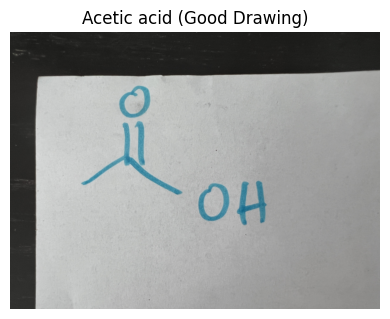

2025-05-16 21:32:06.521 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 21:32:06.521 Session state does not function when running a script without `streamlit run`
2025-05-16 21:32:06.522 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Detected SMILES: CC(=O)O
Is is accepted? Yes


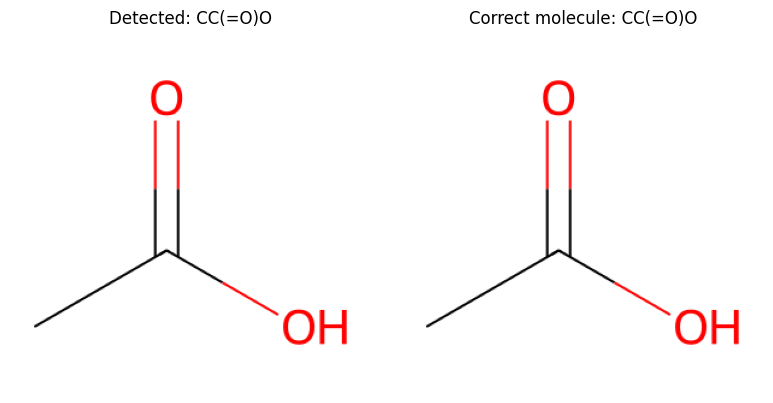

--------------------------------------------------------------------------------


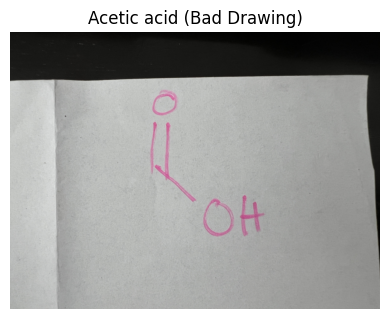

2025-05-16 21:32:12.386 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 21:32:12.387 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Detected SMILES: C(=O)O
Is is accepted? No


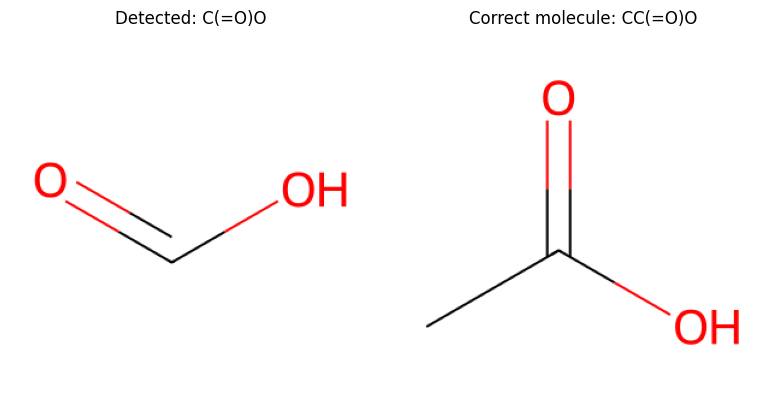

--------------------------------------------------------------------------------
## Testing Adenine (Expected SMILES: Nc1ncnc2[nH]cnc12)


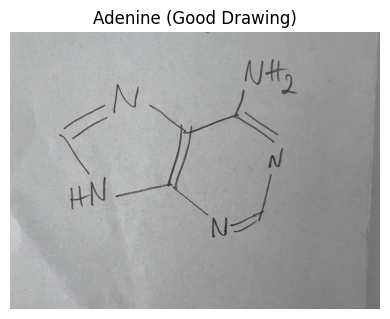

2025-05-16 21:32:18.561 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 21:32:18.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Detected SMILES: Nc1ncnc2[nH]cnc12
Is is accepted? Yes


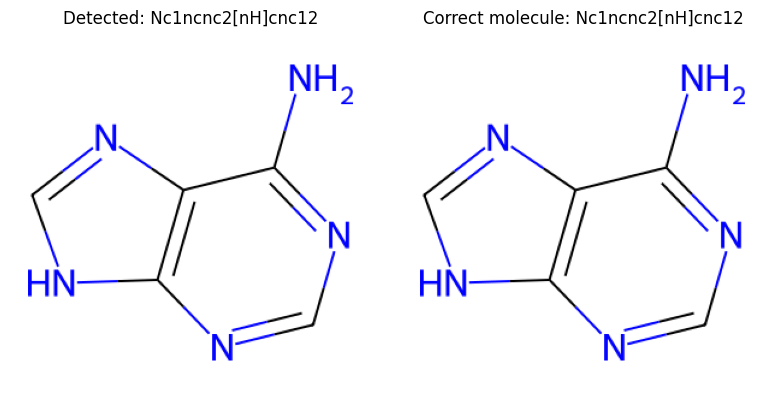

--------------------------------------------------------------------------------


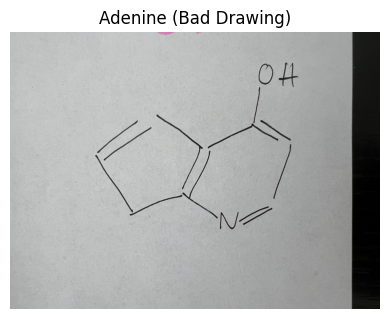

2025-05-16 21:32:24.451 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 21:32:24.453 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Detected SMILES: c1cc2[nH]c(=O)c(O)c2c1
Is is accepted? No


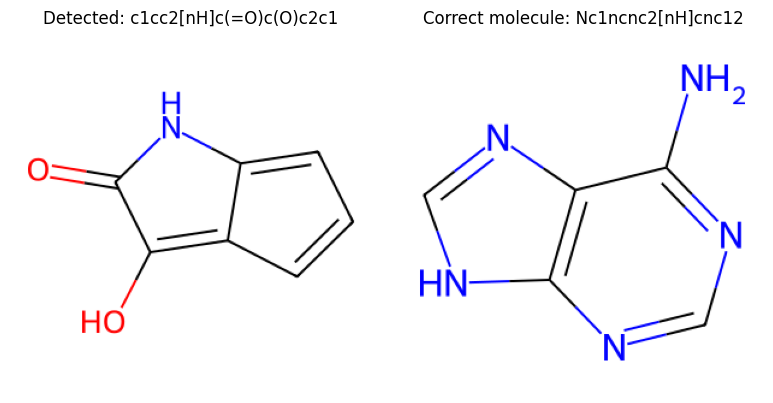

--------------------------------------------------------------------------------
## Testing Cyclohexane (Expected SMILES: C1CCCCC1)


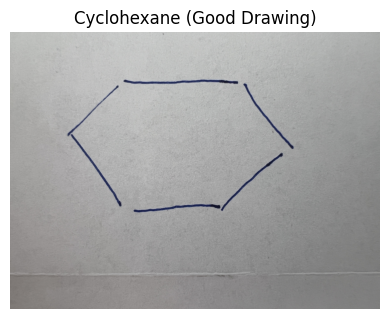

2025-05-16 21:32:31.216 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 21:32:31.218 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Detected SMILES: C1CCCCC1
Is is accepted? Yes


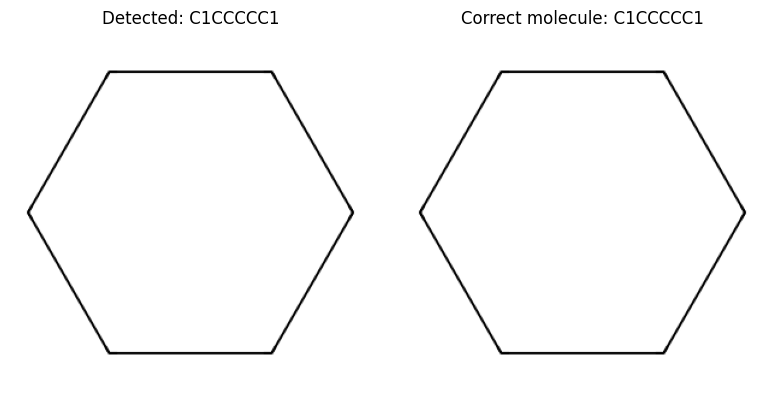

--------------------------------------------------------------------------------


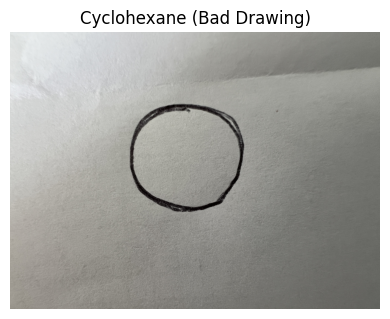

2025-05-16 21:32:36.309 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 21:32:36.310 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Detected SMILES: INVALID_STRUCTURE
Is is accepted? No
Invalid structure detected
--------------------------------------------------------------------------------


[21:32:36] SMILES Parse Error: syntax error while parsing: INVALID_STRUCTURE
[21:32:36] SMILES Parse Error: check for mistakes around position 3:
[21:32:36] INVALID_STRUCTURE
[21:32:36] ~~^
[21:32:36] SMILES Parse Error: Failed parsing SMILES 'INVALID_STRUCTURE' for input: 'INVALID_STRUCTURE'


In [2]:
# For demonstration purposes, we'll use some pre-defined images from the data folder and SMILES strings 

sample_molecules = {
    "Acetic acid": "CC(=O)O",
    "Adenine": "Nc1ncnc2[nH]cnc12",
    "Cyclohexane": "C1CCCCC1", 
} 

# Path to test data (images)
TEST_DATA_DIR = "../data/testdata"
api_key = get_gemini_api_key()

for name, smiles in sample_molecules.items():
    print(f"## Testing {name} (Expected SMILES: {smiles})")
    
    # Find good and bad images for this molecule
    good_image_path = os.path.join(TEST_DATA_DIR, f"{name.lower().replace(' ', '_')}_good.jpg")
    bad_image_path = os.path.join(TEST_DATA_DIR, f"{name.lower().replace(' ', '_')}_bad.jpg")
    
    for img_path, quality in [(good_image_path, "Good"), (bad_image_path, "Bad")]:
        if os.path.exists(img_path):
            # Display the test image
            img = Image.open(img_path)
            plt.figure(figsize=(4, 4))
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{name} ({quality} Drawing)")
            plt.tight_layout()
            plt.show()
            
            # Get SMILES from image using Gemini
            with open(img_path, 'rb') as f:
                image_bytes = f.read()
            
            # Get detected molecule -> results will vary
            detected_smiles = get_molecule_with_ai(api_key, image_bytes, smiles, jupyternb=True)
            print(f"Detected SMILES: {detected_smiles.text.strip()}")

            #Is the detected molecule the same as the target molecule? -> see SMILES verification in next section
            print("Is is accepted?" + " " + "Yes" if validate_drawing_with_ai(detected_smiles, smiles, 0.85) else "Is is accepted?" + " " + "No") 
            detected_smiles = detected_smiles.text.strip()
            
            # Display detected and expected molecules side by side
            if detected_smiles and detected_smiles != "INVALID_STRUCTURE":
                try:
                    # Create a figure with two subplots side by side
                    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
                    
                    # Display detected molecule
                    mol1 = Chem.MolFromSmiles(detected_smiles)
                    img1 = Draw.MolToImage(mol1, size=(300, 300))
                    ax1.imshow(img1)
                    ax1.axis('off')
                    ax1.set_title(f"Detected: {detected_smiles}")
                    
                    # Display correct molecule
                    mol2 = Chem.MolFromSmiles(smiles)
                    img2 = Draw.MolToImage(mol2, size=(300, 300))
                    ax2.imshow(img2)
                    ax2.axis('off')
                    ax2.set_title(f"Correct molecule: {smiles}")
                    
                    plt.tight_layout()
                    plt.show()
                except Exception as e:
                    print(f"Error displaying molecules: {e}")
                    print(f"Detected SMILES: {detected_smiles}")
            else:
                print("Invalid structure detected")
            print("-" * 80)

## SMILES Verification
---

Now let's focus on what happens after the translation has taken place, in other words: SMILES String → Feedback. Once a molecule is drawn and interpreted by the AI, SketChem performs **SMILES verification** to ensure that the AI’s guess is both **chemically valid** and **correct**.


### What is SMILES Verification?

**SMILES** (Simplified Molecular Input Line Entry System) is a string-based format for representing molecular structures. For example:

- Methane → `C`
- Ethanol → `CCO`
- Benzene → `c1ccccc1`

Verification involves checking whether the SMILES string:
1. Represents a **real, chemically valid molecule**
2. Matches the **intended target molecule** the user was supposed to draw

---

### How Sketchem Verifies SMILES

After Gemini AI generates a SMILES string from a drawing:

1. **Validation**:  
   The SMILES is passed to a chemical toolkit (RDKit) to ensure it is syntactically correct and chemically meaningful.

2. **Comparison**:  
   The SMILES is compared to the correct answer for the current game round.

**Lookup (Optional)**:  
   Sketchem may ask **PubChem** using the SMILES to retrieve the molecule name and display it as feedback — especially useful when the guess is close but incorrect. Thus, we have the hint option in the slides. Say, for instance, the correct answer was methanol, but the AI interprets the drawing as ethanol. Instead of just saying “Wrong!”, SketChem could say: "What you drew looks more like ethanol."
   This is much more helpful for learning.


---

### Why It Matters


Since Pubchem retrieves accurate molecular data, in this case, the name of the molecule, it can provide feedback on the correctness of the drawn molecule. How does this help?

- Prevents players from being marked “correct” for invalid molecules
- Ensures feedback is scientifically grounded, not just AI-driven
- Allows Sketchem to give "hint" feedback (e.g., "You drew ethanol instead of methanol")



In [ ]:
# Create a mock response object to simulate Gemini API's response style
class MockResponse:
    def __init__(self, text):
        self.text = text

# Function to display molecules
def display_molecule(smiles, title=None): 
    """Display a molecule from SMILES string"""
    mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(mol, size=(300, 300))
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(title or smiles)
    plt.tight_layout()
    plt.show()

# Example target SMILES
target_smiles = "CC(=O)C1=CC=CC=C1"  # Acetophenone

# Create mock responses with different SMILES strings
exact_match_response = MockResponse("CC(=O)c1ccccc1")  # Same molecule, but a differently-written SMILES string 
high_similarity_response = MockResponse("CC(=O)c1ccc(C)cc1")  # 4-methylacetophenone (very similar)
medium_similarity_response = MockResponse("c1ccccc1C(=O)O")  # Benzoic acid (medium similarity)
low_similarity_response = MockResponse("CC(=O)O")  # Acetic acid (low similarity)
different_response = MockResponse("c1ccccc1")  # Benzene (structural fragment only)
invalid_response = MockResponse("INVALID_STRUCTURE")  # Invalid structure response

# Test with different thresholds
thresholds = [1, 0.90, 0.80, 0.70, 0.60, 0.50]

# Display target molecule
display_molecule(target_smiles, title=f"Acetophenone (Target Smiles): {target_smiles}")

print("Testing validate_drawing_with_ai with different responses and thresholds:")

print("\nExact match tests (different SMILES, same structure):")
display_molecule(exact_match_response.text, title=f"Testing: {exact_match_response.text}")
for threshold in thresholds:
    result = validate_drawing_with_ai(exact_match_response, target_smiles, threshold)
    print(f"Threshold {threshold}: {'✓ Match' if result is True else '✗ No match'}")

print("\nHigh similarity tests (4-methylacetophenone):")
display_molecule(high_similarity_response.text, title=f"Testing: {high_similarity_response.text}")
for threshold in thresholds:
    result = validate_drawing_with_ai(high_similarity_response, target_smiles, threshold)
    print(f"Threshold {threshold}: {'✓ Match' if result is True else '✗ No match'}")

print("\nMedium similarity tests (Benzoic acid):")
display_molecule(medium_similarity_response.text, title=f"Testing: {medium_similarity_response.text}")
for threshold in thresholds:
    result = validate_drawing_with_ai(medium_similarity_response, target_smiles, threshold)
    print(f"Threshold {threshold}: {'✓ Match' if result is True else '✗ No match'}")

print("\nLow similarity tests (Acetic acid):")
display_molecule(low_similarity_response.text, title=f"Testing: {low_similarity_response.text}")
for threshold in thresholds:
    result = validate_drawing_with_ai(low_similarity_response, target_smiles, threshold)
    print(f"Threshold {threshold}: {'✓ Match' if result is True else '✗ No match'}")

print("\nDifferent molecule tests (Benzene):")
display_molecule(different_response.text, title=f"Testing: {different_response.text}")
for threshold in thresholds:
    result = validate_drawing_with_ai(different_response, target_smiles, threshold)
    print(f"Threshold {threshold}: {'✓ Match' if result is True else '✗ No match'}")

print("\nInvalid structure test:") # Should get '✗ No match' + an error from the C++ backend of RDKit (not through Python's exception mechanism)
result = validate_drawing_with_ai(invalid_response, target_smiles, 0.85)
print(f"Result: {'✓ Match' if result is True else '✗ No match'}")

## Challenges & How We Handled Them
---

At the beginning of the project, our biggest challenge was figuring out how to manage the data for all the Sketchem players. The idea of storing, organizing, and tracking such a large amount of information felt overwhelming. We initially considered using **Firebase / Firestore** (Google's game-oriented database service), which is a cloud-based database. Instead, we quickly realized that Streamlit only runs one instance of every package (for everyone that accesses the website) when it is hosted on its platform Streamlit Cloud. We thus took advantage of that to create a "mock" database which would be stored in a dictionary inside of a python file of our project and would constantly be updated according to the user interactions with the website. This way, we didn't need to maintain an external database, which made things much simpler and helped us avoid extra workload.

As we worked through the project and started developing our ideas, we ran into another big challenge: molecule recognition. Initially, we wanted to use **Decimer** to convert the hand-drawn molecules into SMILES and determine whether the drawing was correct. Although Decimer was incredibly accurate when we tested it locally, we faced several issues including long waiting times (close to 7 minutes for some molecules!) and issues with running the ML model on the Streamlit Cloud platform (over-allocation of resources). This pushed us to look for another solution, and that's when we found **Google's Gemini**. Since LLMs are trained on huge amounts of data, our idea was that Gemini would be an ideal contender for Decimer. After switching to Gemini, many issues such as long wait times and allocation limits were fixed. 

Despite the slight improvement with Gemini, the switch from a dedicated ML-based package to a more generic LLM led to other issues such as uneven accuracy and difficulty in adjusting prompts to fit our needs. Not all correctly drawn molecules were recognized, and occasionally, false drawings were marked as correct. Unfortunately, no solution was found for this.

Another issue arose when we decided to use Gemini for automatic category creation. As expected, Gemini's managed to create categories of molecules linked to a specific word or sentence really accurately. However, it really lagged behind when it came to finding the appropriate SMILES for the molecules in these categories. To improve this, we had the idea to connect Gemini to **PubChem**, a specialized chemistry database. This ensured all the generated SMILES were correct and didn't cause any additional issues later during the molecule recognition process.

For building the web application, we chose **Streamlit** because it's a simple tool for creating web apps. It worked well for developing the core functionality of our project without much trouble. However, Streamlit’s simplicity meant that customizing the layout and formatting was harder than we expected. The default design didn’t meet our expectations, and it often resulted in a very plain user interface. This ended up costing us more time than we had planned. Still, we were able to make the best of it by customizing the layout as much as possible using custom div IDs from the deployed HTML code of the app, and we even created different versions of the web app depending on whether the user was on a phone or a computer.


## Conclusion & Going Further
---

Sketchem reimagines how chemistry is learned by turning molecular structure drawing into an interactive, approachable experience. By engaging visual and motor pathways, drawing supports deeper memorization and by framing the process as a competitive game, Sketchem incentivizes practice. It can be used by study groups for exam preparation or by individuals during their free time. Since categories can be tailored to specific needs, the app is suitable for all types of chemistry courses (organic, inorganic, coordination chemistry, etc.)

By integrating AI with multiplayer gameplay, Sketchem offers a novel approach to mastering chemical structures. Its user-friendly interface requires no prior training, and a built-in guide ensures that anyone can begin using the app effectively within minutes.

Our goal was to make learning chemistry fun and accessible. Turning study time into game time, it might even bring a bit of fun into exam season!


### Key Achievements

1. **Gamified Learning**  
   Built an interactive platform that turns molecular memorization into an engaging challenge

2. **AI-Powered Recognition**  
   Integrated AI-based recognition that interprets hand-drawn molecules and converts them into SMILES strings

3. **Verification System**  
   Ensures SMILES strings are both syntactically correct and match the molecules asked using a dual-layer system: AI + PubChem validation

4. **Multiplayer Support**  
   Developed a real-time multiplayer experience using in-memory session state — no external servers needed

5. **Custom Categories with AI**  
   Enabled students to create personalized molecule sets tailored to their own study needs


### Future Directions


1. **Improved Recognition Accuracy**  
   Further training and optimization of the AI model

2. **Expanded Molecule Library**  
   Offer more curated categories (e.g., drug molecules, biomolecules) with difficulty levels and explanations

3. **Advanced Game Modes**
    Reverse Mode: Instead of drawing, the game shows a molecular structure and the player must type the correct IUPAC name. Perfect for practicing nomenclature and reinforcing recognition from structure to name.
    Cooperative mode: you can share a 'board' with your friends and work together to draw molecules

4. **Logging in**  
   Enable users to log in and save their favorite categories and progress and let them revisit previous rounds, view their drawings side-by-side with the correct molecules. This would allow seamless use across different sessions or devices. 

5. **Multiplayer Expansion**
    Allow players to match with random opponents, create tournaments, or challenge friends via invite links

6. **Custom Categories**
   Let users build fully personalized molecule sets by selecting molecules manually, extending beyond the AI-generated categories to support curriculum-specific content.
   
7. **Educator Tools**  
   Let users create folders of categories and share them. This is perfect for study groups, teachers assigning homework, or students collaborating across campuses.

Sketchem transforms chemistry learning by combining AI, drawing-based memorization, and multiplayer gameplay to make molecule practice fun and accessible. We can't wait for you to try it!